# Lecture 3
Monitoring solution process is important. While looking at numbers stored in a text file is fun, it is much easier to comprehend data using graphs and plots.

We will:
* Look at reading numerical data from files (stored as columns of numbers, but other formats can also be read)
* Use the MatPlotLib library to produce some simple line, bar and color plots.

* Have a look at SciPy to illustrate capabilities, find some function extrema and roots, perform some interpolation (and extrapolation).

## Matplotlib
is a very popular plotting library for python. It can be used to produce almost publication quality figures. Personally I use it for most of my plotting needs, but for publications I prefer Latex Tix library.

Let us start with our first plot of some `f(x)` function. We will be using `nympy.array` to handle our data. To use `matplotlib` we need to import it:

### First plot

In [1]:
import matplotlib.pyplot as plt

To have a plot for $x \in [-1, 1]$ we will use `numpy.linspace()` we skipped last time:

In [2]:
import numpy as np

x = np.linspace(-1, 1, 101)
# Generate 101 points between -1 and 1 including boundaries
y = x**2

And plotting `y(x)` is just:

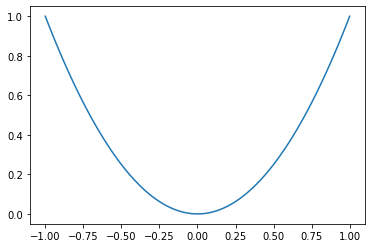

In [3]:
plt.plot(x, y)

We can do many things with the plot. Add grid, set axis limits, add text, labels, change sizes, colors, etc.

For now let just increase the size of the plot, add a legend entry  a grid, change the font size and thickness of the line.

We can also do a scatter plot:

(-0.05, 1.05)

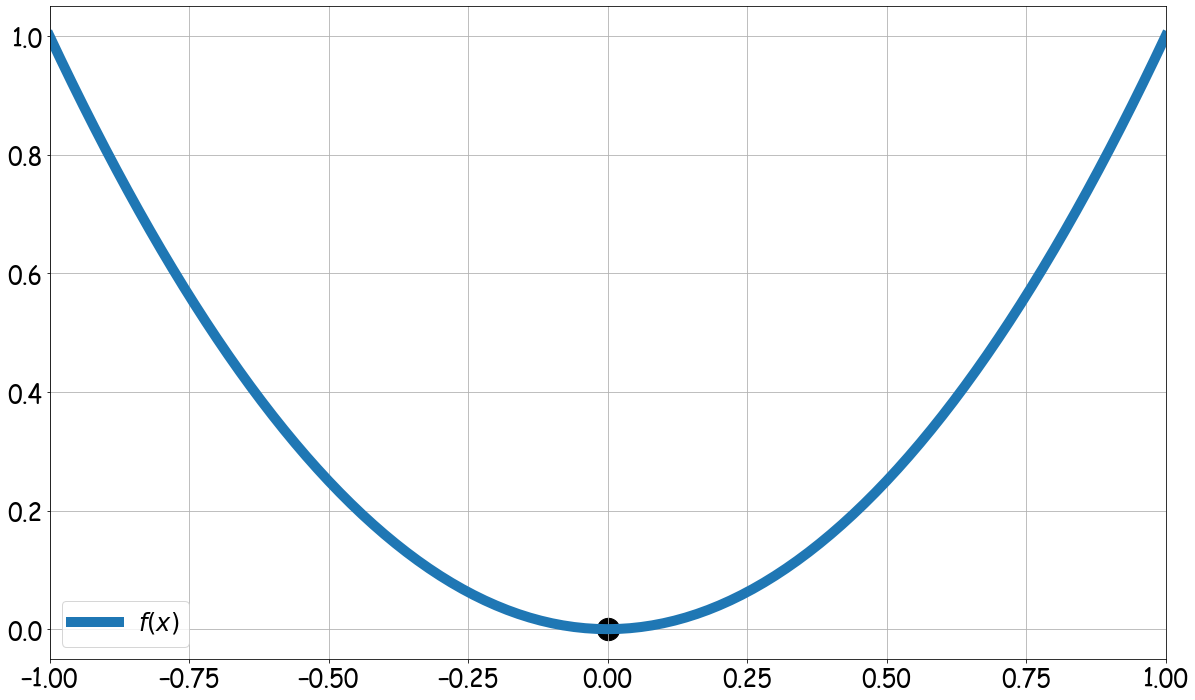

In [4]:
f = plt.figure(figsize=(20,12)) # figure size
font = {'family' : 'Comic Sans MS', 'weight' : 'normal', 'size'   : 24} #larger font I like
plt.rc('font', **font)

plt.plot(x, y, label='$f(x)$', lw=10)
plt.scatter(0,0, s=500, c='black')

plt.grid()
plt.legend()
plt.xlim(x[0], x[-1])
plt.ylim(min(y)-0.05, max(y)+0.05)

So we can make a plot:
* Add log scaling
* Show plotting with subplots
* TBA

## Reading from files (with data)
We consider a computational process monitoring of which is performed with a text data stored to a file during the calculation. Here I have a file `mean.avg` that contains average values of some vector field in time:

In [5]:
ls

'Lecture 3.ipynb'   mean.avg


Let's start by examining the content of the file (in notepad).

The file contains columns of numbers (possibly comma separated, or not) so the best way to treat is is to precess it directly to NymPy arrays using NumPy functions. Note: Processing of ``noraml`` text files can also be performed, but in case of data files using NumPy functions is more natural.

In [6]:
T, c1, c2, c3 = np.loadtxt('mean.avg', comments="#", skiprows=1, usecols=(0,1,2,3), unpack=True)

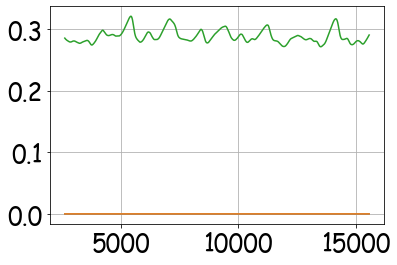

In [7]:
plt.plot(T, c1, T, c2, T, c3)
plt.grid()

## SciPy
Is the second probably most commonly (my opinion rather than fact) used library when it comes to processing data. You could say, that when it comes to numerical procedures - SciPy has it all. We will focus on only some of the available algorithms, but should you need more - you know where to look.

We will:
* Decimate data with slice operations
* Use interpolation to build a continuous view of data
* Look for extrema
* Look for roots
* Integrate
* Solve an ODE
* Curve fitting

and all that in a day work.

We will use a slice of data from mean.avg, using the slice operation with collection\[start : stop : every n'th\]. The last entry is used to select only some of the data.

In [8]:
X =  T[10000:13000:250] # We can select every other value from an array!
Y = c3[10000:13000:250]
print(len(X), len(Y))

12 12


Lets plot the original data, and the points selected from it and stored in `X` and `Y`:

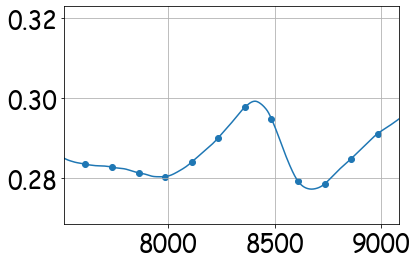

In [9]:
plt.plot(T, c3)
plt.scatter(X, Y)

plt.xlim(X[0]-100, X[-1]+100)
plt.grid()

### Interpolation
There is a number of interpolation procedures available from Scipy, the most up to date list can be found here: https://docs.scipy.org/doc/scipy/reference/interpolate.html  

Choosing the right interpolation technique is vary much problem dependant, might require some trial-and-error  and here we will focus on the use of only some more general SciPy interpolation procedures, allowing to easily switch between interpolation techniques.

**Note:** We will only do 1D interpolation, but higher dimensions are also possible, see e.g. [CloughTocher2DInterpolator](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.CloughTocher2DInterpolator.html#scipy.interpolate.CloughTocher2DInterpolator).

#### `scipy.interpolate.interp1d`
The first is the `interp1D`, it allows for different types of **interpolation**, but does not allow for **extrapolation**. The advantage is that it is very easy to use. A general call to `interp1D` needs the pass of arrays of values used to build the interpolating function of a selected kind. The `kind` can be any of the implemented. The default is `'linear'`, but we will look at: `zero`, `slinear`, `quadratic` and `cubic`  - feturing [splines](https://en.wikipedia.org/wiki/Spline_%28mathematics%29) of a respective order:

**Note** the difference between *interpolation*, which is the act of approximating a value in between the known values and *extrapolation*, which is guessing outside of the known values.

To use `interp1D` lets import it from `scipy` module:

In [10]:
from scipy.interpolate import interp1d

`interp1d` returns a function object to be used with data:

In [11]:
f = interp1d(X, Y) # default is liner

Which we can use as any other function with Python, with a single variable, a list or a NumPy array:

In [12]:
print(f(8000))
print(f(X[3]))
print(f(X[3:6]))

0.2808821257384416
0.280445966782
[0.28044597 0.28410502 0.29017429]


Lets, see how good our interpolation is, using linear distribution of points:

In [13]:
x = np.linspace(X[0], X[-1], 10000) # only interpolation
# x = np.linspace(X[0]-100, X[-1]+100, 1000) # interp1d does not work with extrapolation!

**Note:** Show the pitfalls of dynamic typing.  
Replace `fig = plt.figure(figsize=(20,12))`  
with `f = plt.figure(figsize=(20,12))` which you normally use and have a nice error!

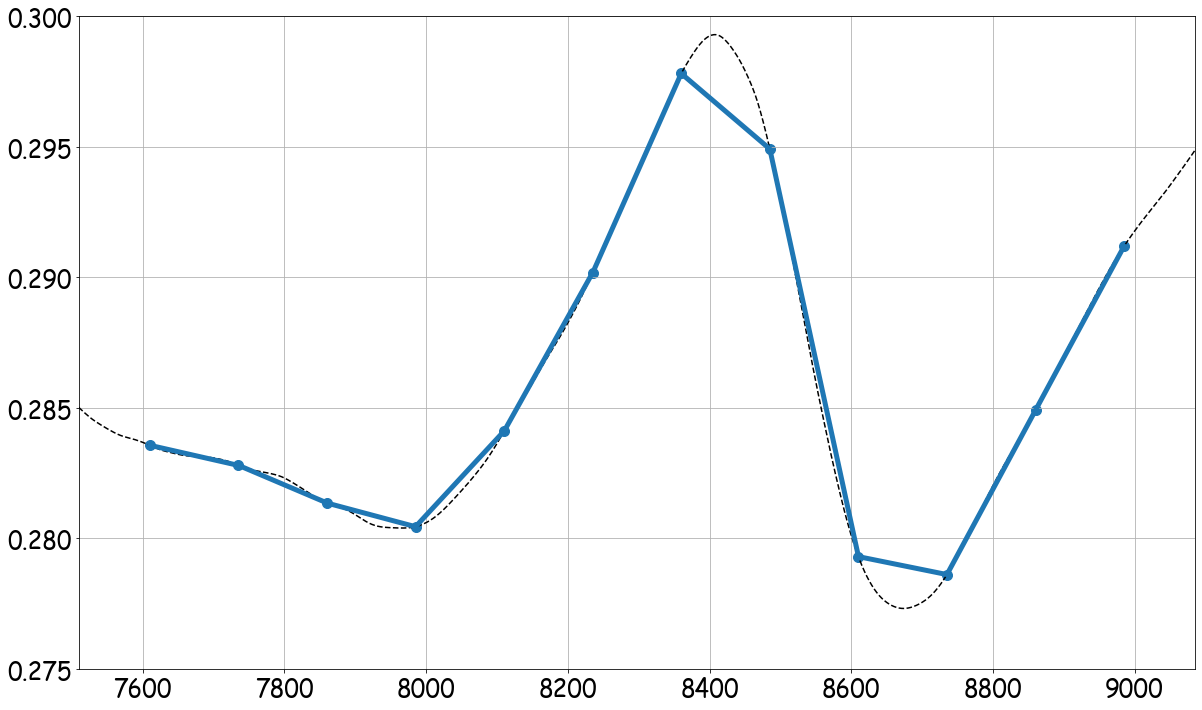

In [14]:
fig = plt.figure(figsize=(20,12)) # figure size
font = {'family' : 'Comic Sans MS', 'weight' : 'normal', 'size'   : 24} #larger font I like
plt.rc('font', **font)

plt.plot(T, c3, '--', c='black') # '--' - dashed, c - colour, 
plt.scatter(X, Y, s=100) # s sets size
plt.plot(x, f(x), lw=5) # lw - line width

plt.xlim(X[0]-100, X[-1]+100)
plt.ylim(0.275, 0.3)
plt.grid()

And we have a nice linear interpolation. Let's try the remaining types, and get a glimpse at how interpolating functions differ:

In [15]:
fzero    = interp1d(X, Y, kind='zero') # default is liner
fslinear = interp1d(X, Y, kind='slinear')
fquadratic = interp1d(X, Y, kind='quadratic')
fcubic = interp1d(X, Y, kind='cubic')

We will take this occasion to add a legend to our plot. This is done by placing a `label='label text'` in the `plot()` call and calling on the `legend()` function.

**Note:** `label=''` accepts Latex mathematical environment with \$\$. 

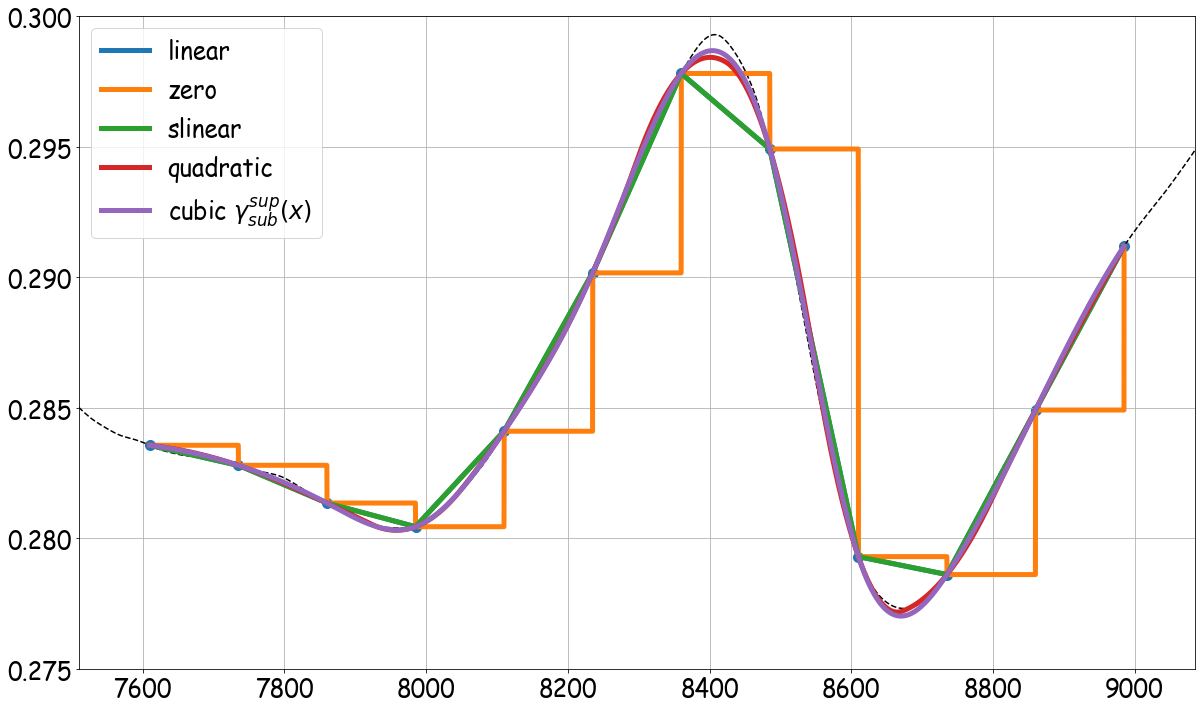

In [16]:
fig = plt.figure(figsize=(20,12)) # figure size
font = {'family' : 'Comic Sans MS', 'weight' : 'normal', 'size'   : 24} #larger font I like
plt.rc('font', **font)

plt.plot(T, c3, '--', c='black') # '--' - dashed, c - colour, 
plt.scatter(X, Y, s=100) # s sets size

# Note the use of label in the function call - we will have a legend!
plt.plot(x, f(x), lw=5, label='linear') # 
plt.plot(x, fzero(x), lw=5, label='zero') # 
plt.plot(x, fslinear(x), lw=5, label='slinear') # 
plt.plot(x, fquadratic(x), lw=5, label='quadratic') # 
plt.plot(x, fcubic(x), lw=5, label='cubic $\gamma_{sub}^{sup}(x)$') # $ math goes here $

# It is going to be Legendary!
plt.legend()
plt.xlim(X[0]-100, X[-1]+100)
plt.ylim(0.275, 0.3)
plt.grid()

#### `scipy.interpolate.InterpolatedUnivariateSpline`
Returns a 1D interpolating spline for a provided data. Aside from data we may pass weights, degree of the spline (`$1<=k<=5$`) and a flag specifyingwhat should happen out of data bounds, the extrapolation `ext $\in (0,3)$`.

In [17]:
from scipy.interpolate import InterpolatedUnivariateSpline

x = np.linspace(X[0]-100, X[-1]+100, 1000) # we will be extrapolating!

f = InterpolatedUnivariateSpline(X, Y, k=1)

We will use this moment to show how to look for array indices that correspond to a given value. For the case of a sorted array it is probably best to use the `numpy.searchsorted` function. It accepts a sorted collection and values (or a value) and returns an index where the value should be inserted to maintain the order (sortiness??) of the collection. Example:

In [18]:
a = np.searchsorted(x, X[0])
b = np.searchsorted(x, X[-1])
print(a, b)

print(x[a], X[0])
print(x[b], X[-1])

64 936
7611.000900900901 7610.1
8985.775675675675 8985.1


`a` and `b` are indices of the first greater than `X[0]` and `X[-1]` elements of `x`.

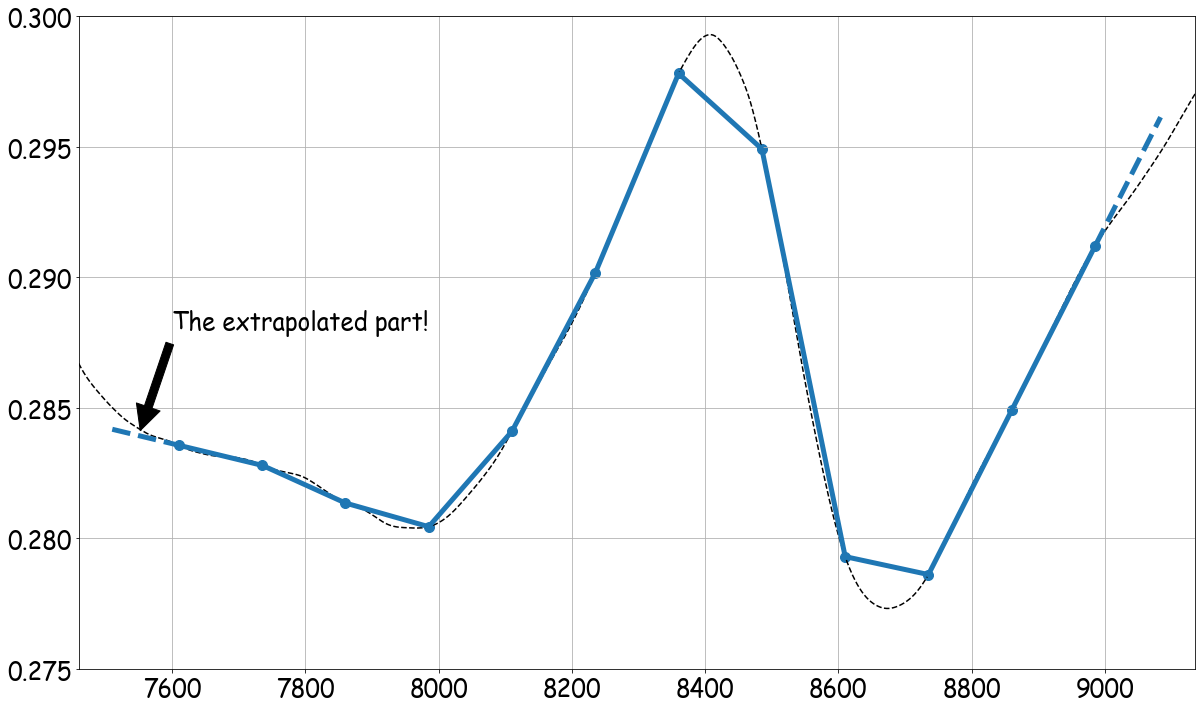

In [19]:
fig = plt.figure(figsize=(20,12)) # figure size
font = {'family' : 'Comic Sans MS', 'weight' : 'normal', 'size'   : 24} #larger font I like
plt.rc('font', **font)

plt.plot(T, c3, '--', c='black') # '--' - dashed, c - colour, 
plt.scatter(X, Y, s=100) # s sets size

a = np.searchsorted(x, X[0])
b = np.searchsorted(x, X[-1])
p = plt.plot(x[a:b], f(x[a:b]), lw=5) # note, we return to p
plt.plot(x[0:a], f(x[0:a]), '--', lw=5, c = p[0].get_color()) # to get the same colour
plt.plot(x[b:-1], f(x[b:-1]), '--', lw=5, c = p[0].get_color())

ax = plt.gca()
ax.annotate('The extrapolated part!', xy=(x[25], f(x[25])), xytext=(7600, 0.288),
            arrowprops = dict(facecolor ='black', width=8, headwidth=25, headlength=25, shrink = 0.05),)

plt.xlim(X[0]-150, X[-1]+150)
plt.ylim(0.275, 0.3)
plt.grid()

Note the use of `annotate` to place an arrow and some text to our plot.

Lets experiment with `exp` and `k`:
* `ext=0` or `‘extrapolate’` - default.
* `ext=1` or `‘zeros’`, returns 0.
* `ext=2` or `‘raise’`, raise a `ValueError`.
* `ext=3` of `‘const’`, return boundary value.

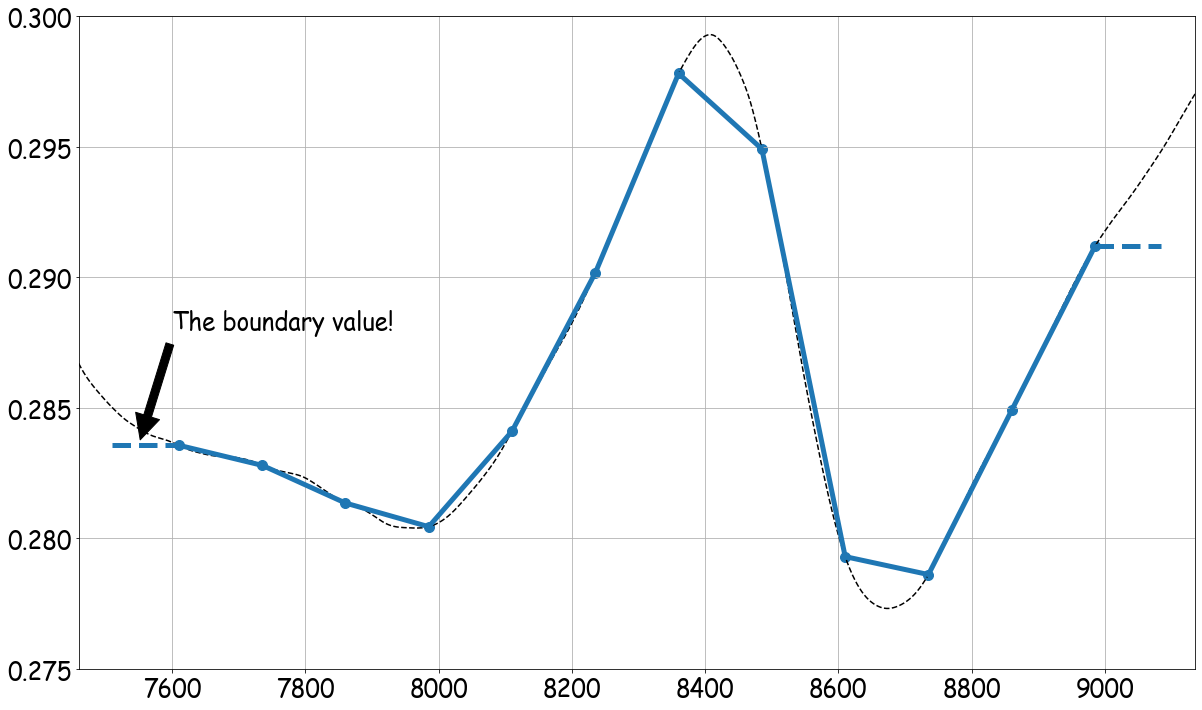

In [20]:
f = InterpolatedUnivariateSpline(X, Y, k=1, ext=3)

fig = plt.figure(figsize=(20,12)) # figure size
font = {'family' : 'Comic Sans MS', 'weight' : 'normal', 'size'   : 24} #larger font I like
plt.rc('font', **font)

plt.plot(T, c3, '--', c='black') # '--' - dashed, c - colour, 
plt.scatter(X, Y, s=100) # s sets size

a = np.searchsorted(x, X[0])
b = np.searchsorted(x, X[-1])
p = plt.plot(x[a:b], f(x[a:b]), lw=5) # note, we return to p
plt.plot(x[0:a], f(x[0:a]), '--', lw=5, c = p[0].get_color()) # to get the same colour
plt.plot(x[b:-1], f(x[b:-1]), '--', lw=5, c = p[0].get_color())

ax = plt.gca()
ax.annotate('The boundary value!', xy=(x[25], f(x[25])), xytext=(7600, 0.288),
            arrowprops = dict(facecolor ='black', width=8, headwidth=25, headlength=25, shrink = 0.05),)

plt.xlim(X[0]-150, X[-1]+150)
plt.ylim(0.275, 0.3)
plt.grid()

In [21]:
f1 = InterpolatedUnivariateSpline(X, Y, k=1)
f2 = InterpolatedUnivariateSpline(X, Y, k=2)
f3 = InterpolatedUnivariateSpline(X, Y, k=3)
f4 = InterpolatedUnivariateSpline(X, Y, k=4)
f5 = InterpolatedUnivariateSpline(X, Y, k=5)

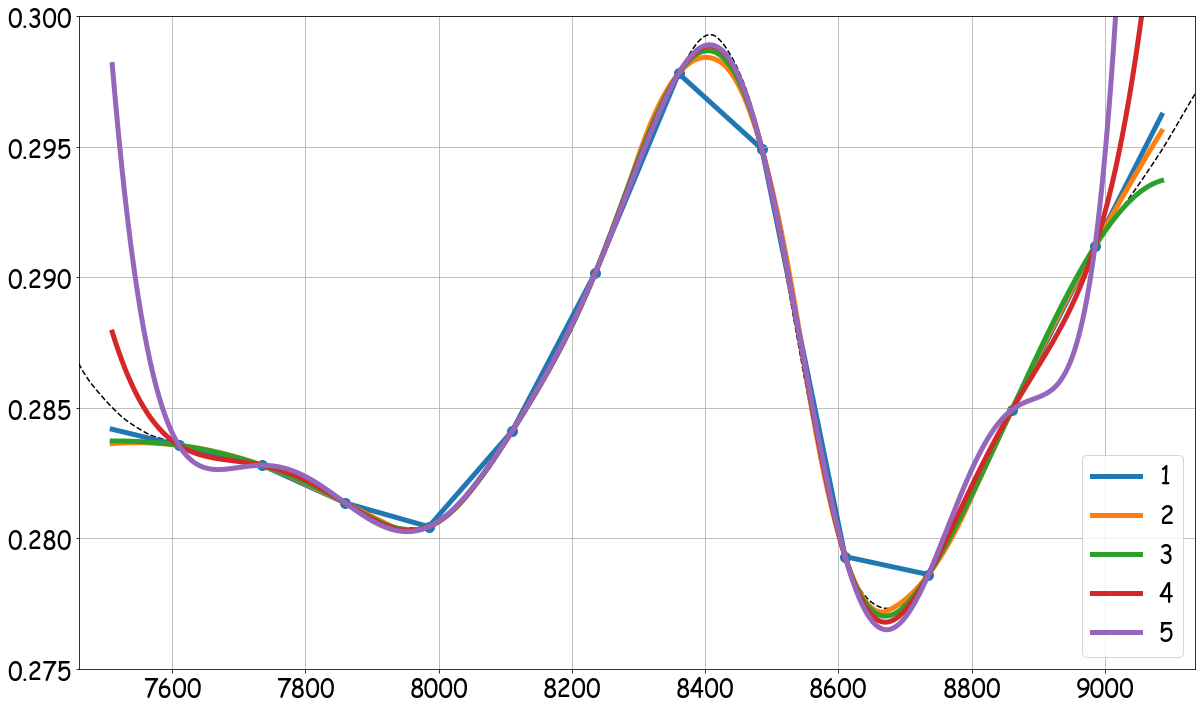

In [22]:
fig = plt.figure(figsize=(20,12)) # figure size
font = {'family' : 'Comic Sans MS', 'weight' : 'normal', 'size'   : 24} #larger font I like
plt.rc('font', **font)

plt.plot(T, c3, '--', c='black') # '--' - dashed, c - colour, 
plt.scatter(X, Y, s=100) # s sets size

plt.plot(x, f1(x), lw=5, label='1')
plt.plot(x, f2(x), lw=5, label='2')
plt.plot(x, f3(x), lw=5, label='3')
plt.plot(x, f4(x), lw=5, label='4')
plt.plot(x, f5(x), lw=5, label='5')

plt.legend()
plt.xlim(X[0]-150, X[-1]+150)
plt.ylim(0.275, 0.3)
plt.grid()

### Finding extreme value
We know how to build an interpolating function from data. Let's say the points we have result from some form of a process we monitor and that we would like to find the extreme value. We will assume the process to be represented by some interpolant and look for the maximum. Note we are not interested in the maximum, stored in the array (`max(f(x))`), but in the extrema of a function, that corresponds to whatever our problem is.

Let start with just examining the arrays:

In [23]:
print( max(Y), max( f2(x)) )
i = np.where(f2(x) == max(f2(x)))
print(i, x[i], f2(x[i]))

0.29781560279 0.29843369850530627
(array([565]),) [8400.86576577] [0.2984337]


So an element of `x` corresponds to a value returned by an interpolating function `f2` (one of many) that happens to be the elemental maximum - nice, but not what we want yet.

In what fallows we will use a `scipy.optimize` module minimization procedure `scipy.optimize.minimize`. As before should you need something more fancy, have a look at the documentation [here](https://docs.scipy.org/doc/scipy/reference/optimize.html). I will use the `f2` created from interpolation before.

We need to import an appropriate module:

In [24]:
from scipy.optimize import minimize

`minimize` takes a number of arguments. Two are required the function to be minimized and the initial guess. You can also specify the particular method you wish to use (see docs), bounds, tolerance, etc.

The returned value is an object containing a number of informations. To us the most important is the result.   
**(experiment with starting value, and bounds)**

In [25]:
# res = minimize(f2, 8450)
res = minimize(f2, x0=8600, bounds=((8400, 8800),) ) # note the nasty way bounds are provided
print(res)

      fun: array([0.27717336])
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([2.22044605e-08])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 24
      nit: 3
   status: 0
  success: True
        x: array([8664.98580191])


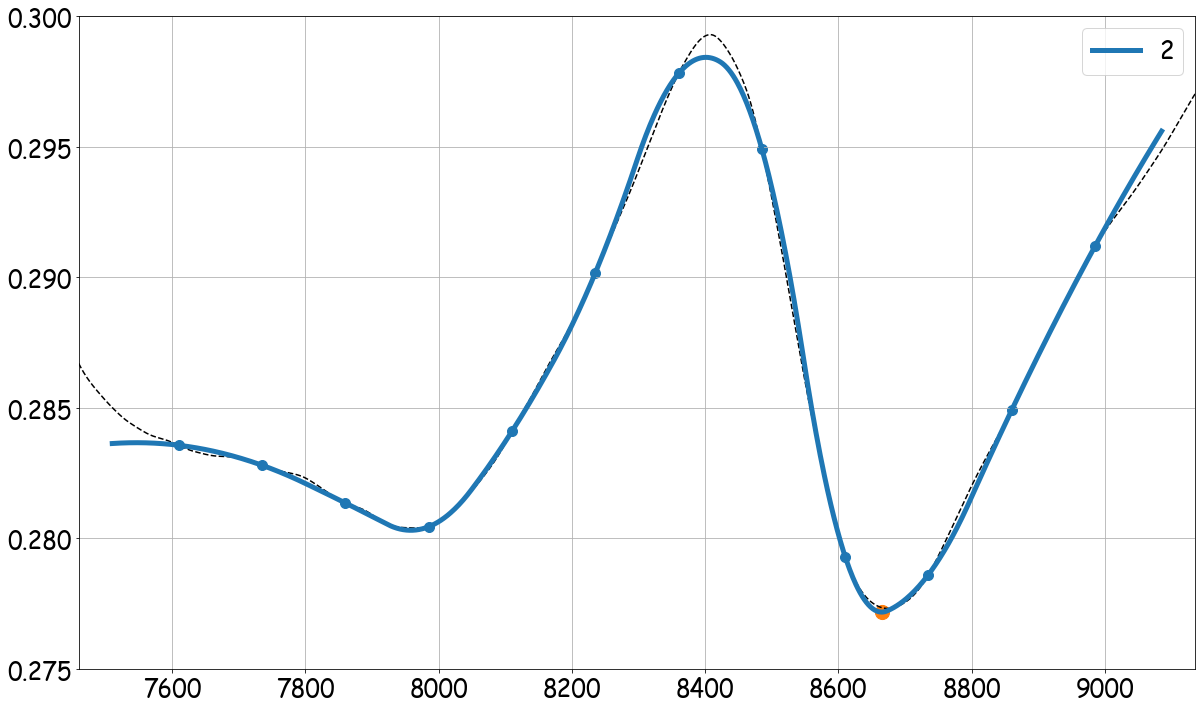

In [26]:
fig = plt.figure(figsize=(20,12)) # figure size
font = {'family' : 'Comic Sans MS', 'weight' : 'normal', 'size'   : 24} #larger font I like
plt.rc('font', **font)

plt.plot(T, c3, '--', c='black') # '--' - dashed, c - colour, 
plt.scatter(X, Y, s=100) # s sets size

plt.plot(x, f2(x), lw=5, label='2')
plt.scatter(res.x, f2(res.x), s=200)

plt.legend()
plt.xlim(X[0]-150, X[-1]+150)
plt.ylim(0.275, 0.3)
plt.grid()

**Note:** Should we want to find the maximum, a small addition is needed:

In [27]:
def f22(x):
    return -1*f2(x)

In [28]:
res = minimize(f22, x0=0.5*(x[0]+X[-1]), bounds=((X[0], X[-1]),) )
print(res)

      fun: array([-0.29843369])
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([1.55431223e-07])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 18
      nit: 3
   status: 0
  success: True
        x: array([8401.21539562])


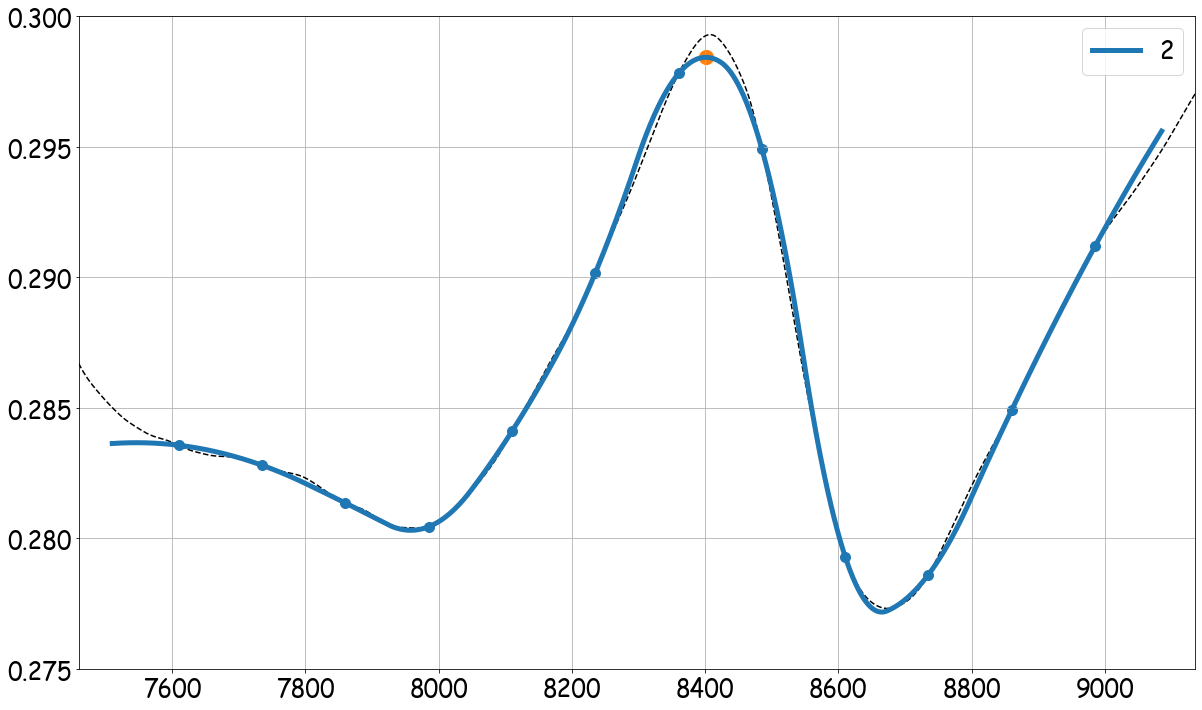

In [29]:
fig = plt.figure(figsize=(20,12)) # figure size
font = {'family' : 'Comic Sans MS', 'weight' : 'normal', 'size'   : 24} #larger font I like
plt.rc('font', **font)

plt.plot(T, c3, '--', c='black') # '--' - dashed, c - colour, 
plt.scatter(X, Y, s=100) # s sets size

plt.plot(x, f2(x), lw=5, label='2')
plt.scatter(res.x, f2(res.x), s=200)

plt.legend()
plt.xlim(X[0]-150, X[-1]+150)
plt.ylim(0.275, 0.3)
plt.grid()

#### Example:
We will now write a piece of code to improve localization of an minimum. Starting with some `X` and `Y` arrays that mimic a limited numbers of test that we have on the actual process represented by `x` and `y` we will iterate by finding minima of an interpolating functions, than choosing those as points to probe `x` and `y` and inserting values data arrays used for interpolation:

In [30]:
X =  T[10000:14000:1000] # We can select every other value from an array!
Y = c3[10000:14000:1000]
x = np.linspace(X[0], X[-1], 10000)
print(len(X), len(Y))

4 4


-> iteration starts here <-

In [45]:
f2 = InterpolatedUnivariateSpline(X, Y, k=2)
res = minimize(f2, x0=8600, bounds=((X[0], X[-1]),), tol=1e-12)
print(res)
print(res.x[0], f2(res.x[0]))

      fun: array([0.27669255])
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 28
      nit: 5
   status: 0
  success: True
        x: array([8671.11900068])
8671.119000675793 0.2766925458000439


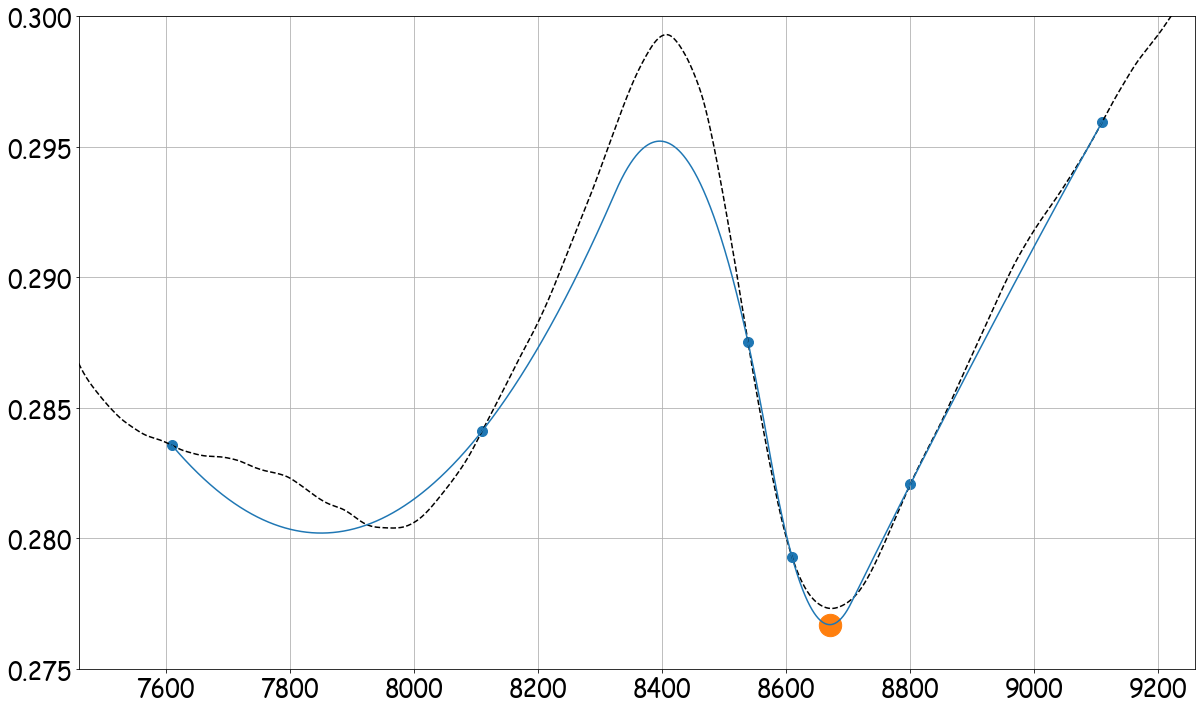

In [46]:
fig = plt.figure(figsize=(20,12)) # figure size
font = {'family' : 'Comic Sans MS', 'weight' : 'normal', 'size'   : 24} #larger font I like
plt.rc('font', **font)

plt.plot(T, c3, '--', c='black') # '--' - dashed, c - colour, 
plt.scatter(X, Y, s=100) # s sets size
plt.plot(x, f2(x))
plt.scatter(res.x, f2(res.x), s=500)

plt.xlim(X[0]-150, X[-1]+150)
plt.ylim(0.275, 0.3)
plt.grid()

We now need to run our process for the value of an argument we determined to result in the minimum of the interpolating function (if it is the best strategy, that is another story). In our case this is equivalent to finding the values in `T` and `c3` arrays:

In [47]:
idx = np.searchsorted(T, res.x)
newX = T[idx]
newY = c3[idx]
print(idx, res.x, newX, newY)

[12123] [8671.11900068] [8671.6] [0.27731442]


We will use `numpy.insert` to update our `X` and `Y` with newly acquired values. `insert` needs to now the index before which it should insert:

In [48]:
a = np.searchsorted(X, newX)
X = np.insert(X, a, newX)
Y = np.insert(Y, a, newY)

Redo the interpolation:

In [49]:
f2 = InterpolatedUnivariateSpline(X, Y, k=2)

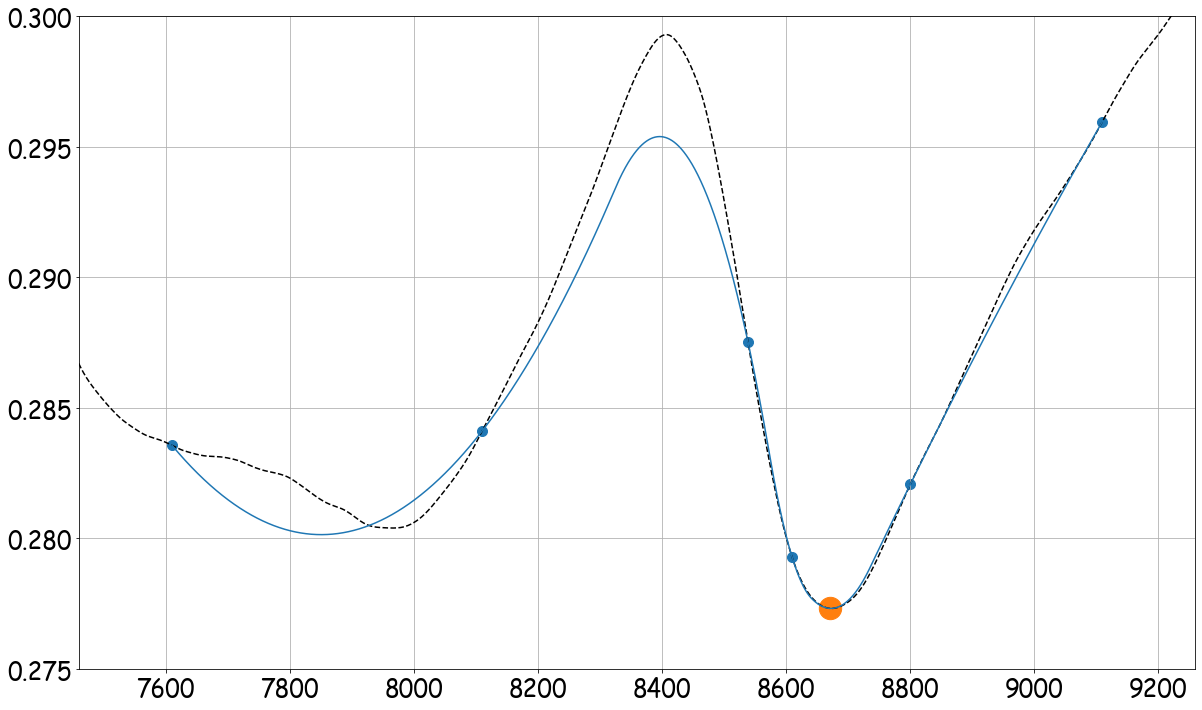

In [50]:
fig = plt.figure(figsize=(20,12)) # figure size
font = {'family' : 'Comic Sans MS', 'weight' : 'normal', 'size'   : 24} #larger font I like
plt.rc('font', **font)

plt.plot(T, c3, '--', c='black') # '--' - dashed, c - colour, 
plt.scatter(X, Y, s=100) # s sets size
plt.plot(x, f2(x))
plt.scatter(res.x, f2(res.x), s=500)

plt.xlim(X[0]-150, X[-1]+150)
plt.ylim(0.275, 0.3)
plt.grid()

We can reiterate, or close everything in a nice loop and a procedure.

### Roots
As with the others there is a number of procedures, and it is up to you to select the one that is right for your problem.

In [51]:
from scipy.optimize import root_scalar

In [52]:
def fun(x):
    return f2(x) - 0.280

In [53]:
res = root_scalar(fun, x0=8400, x1=8800)

In [54]:
print(res, res.root, fun(res.root))

      converged: True
           flag: 'converged'
 function_calls: 9
     iterations: 8
           root: 8758.650969979883 8758.650969979883 0.0


### Curve fitting
Here we show an example of curve fitting using least-square approximation. We try to find parameters of a function that best fits some points:

In [55]:
from scipy.optimize import curve_fit

In [71]:
def fun(x, a, b, c):
    return a*x**5 + b*x**3 + c

In [72]:
popt, pcov = curve_fit(fun, X, Y)
print(popt)

[ 5.41474979e-21 -6.14903243e-13  4.18260747e-01]


No handles with labels found to put in legend.


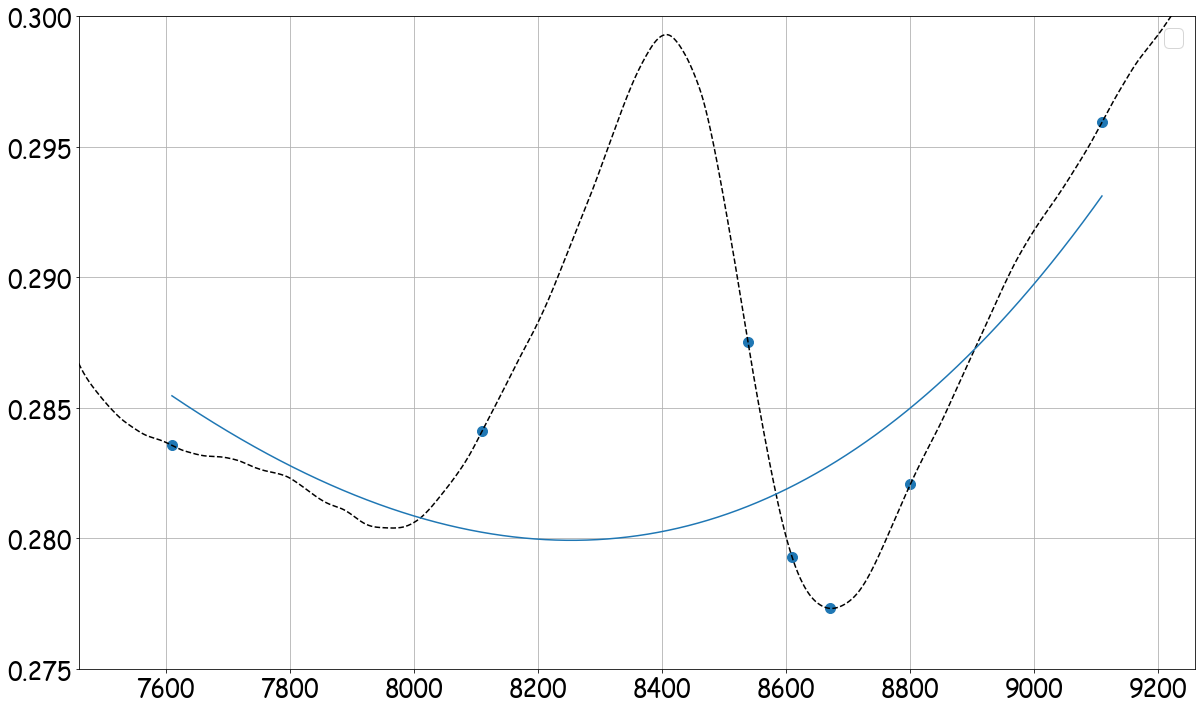

In [73]:
fig = plt.figure(figsize=(20,12)) # figure size
font = {'family' : 'Comic Sans MS', 'weight' : 'normal', 'size'   : 24} #larger font I like
plt.rc('font', **font)

plt.plot(T, c3, '--', c='black') # '--' - dashed, c - colour, 
plt.scatter(X, Y, s=100) # s sets size
plt.plot(x, fun(x, *popt))

plt.legend()
plt.xlim(X[0]-150, X[-1]+150)
plt.ylim(0.275, 0.3)
plt.grid()

Not the best fit, but well, works and for some real data might be actually the thing.

### Integration
SciPy provides a number of integration techniques:

In [86]:
from scipy.integrate import quad # general purpose integration/

In [79]:
res = quad(f2, a=X[0], b=X[-1])
print(res[0])

428.17893493911527


### Solving a simple ODE
via `from scipy.integrate.ode` an ODE system of the form $x'(t)=f(t,x)$ might be solved.

In [94]:
from scipy.integrate import odeint

`ODE` needs the right hand side function defining derivative `f` for a given state `x` and time `t`.

Let consider a system [Lorenz System](https://en.wikipedia.org/wiki/Lorenz_system) (kind of famous - see why), for the evolution of a vector of variables ${\bf x}=[x,y,z]$ in time $t$, according to:  
$$
\begin{cases}
\frac{dx}{dt} = \sigma(y - x)\\
\frac{dy}{dt} = x(\rho - z) - y\\
\frac{dz}{dt} = xy - \beta z
\end{cases}
$$

With initial conditions ${\bf x}(t=0) = [x_0, y_0, z_0]$.

The function defining the derivative is simply:

In [95]:
sigma=10
beta=8./3
rho=28.0

def lor_rhs(x0, t0):
    return [sigma * (x0[1] - x0[0]), x0[0] * (rho - x0[2]) - x0[1], x0[0] * x0[1] - beta * x0[2]]

In [131]:
x0 = [1, 1, 1]
t = np.linspace(0, 20, 10000)  # one thousand time steps
xt = odeint(lor_rhs, x0, t)

We will now plot. New thing is the use of `%matplotlib notebook` that allows us to produce an interactive plot:

<IPython.core.display.Javascript object>


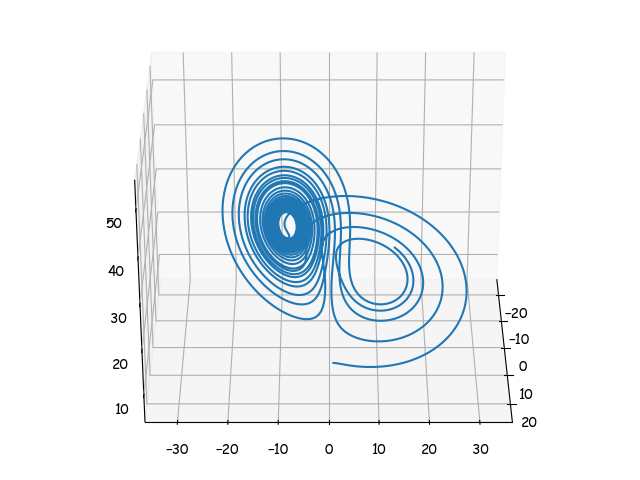

In [133]:
%matplotlib notebook

from matplotlib import pyplot as plt    # this one we know
from mpl_toolkits.mplot3d import Axes3D # Produces 3D axes setting

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1], projection='3d')

x, y, z = xt.T
ax.plot3D(x, y, z)

# prepare the axes limits
ax.set_xlim((-25, 25))
ax.set_ylim((-35, 35))
ax.set_zlim((5, 55))

# set point-of-view: specified by (altitude degrees, azimuth degrees)
ax.view_init(30, 0)

<IPython.core.display.Javascript object>


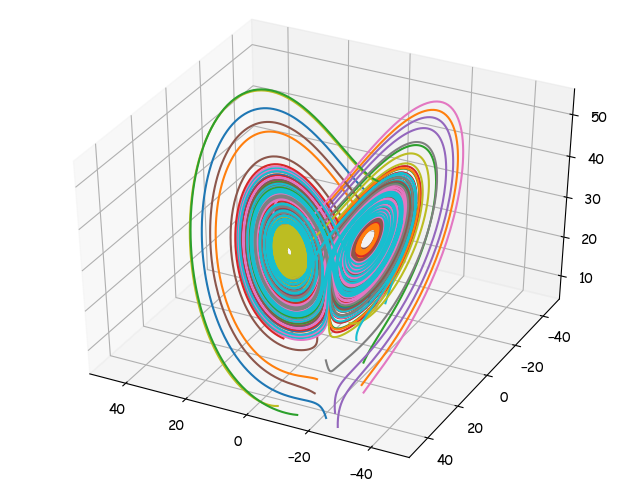

In [140]:
N = 20
# Choose random starting points, uniformly distributed from -15 to 15
np.random.seed(1)
x0 = -15 + 30 * np.random.random((N, 3))

# Solve for the trajectories
t = np.linspace(0, 20, 10000)
xt = np.asarray([integrate.odeint(lor_rhs, x0i, t)
                  for x0i in x0])


fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1], projection='3d')

for xx in xt:
    x, y, z = xx.T
    ax.plot3D(x, y, z)

# prepare the axes limits
ax.set_xlim((-50, 50))
ax.set_ylim((-50, 50))
ax.set_zlim((5, 55))

# set point-of-view: specified by (altitude degrees, azimuth degrees)
ax.view_init(30, 0)